In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from acquire import Acquire
from prepare import Prepare
pd.options.display.max_columns = 50
pd.options.display.max_rows = 500

In [2]:
a = Acquire()
p = Prepare()
telco = a.get_telco_data()
train, _, _ = p.prep_telco(telco)

In [3]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'no_phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'steaming_movies'],
      dtype='object')

In [4]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,no_phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,steaming_movies
0,1,0,0,1,32,1,0,20.5,696.80,0,Two year,None,Mailed check,0,0,0,0,0,0,0,0
1,1,1,1,0,55,1,1,113.6,6292.70,0,Two year,Fiber optic,Electronic check,0,1,0,1,1,1,1,1
2,1,0,1,1,25,1,0,25.5,630.60,0,Two year,None,Credit card (automatic),0,1,0,0,0,0,0,0
3,0,1,1,0,12,1,1,98.1,1060.20,1,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,0,1,0
4,1,0,1,0,63,1,0,102.6,6296.75,0,Two year,Fiber optic,Electronic check,0,1,0,0,1,0,1,1


In [166]:
len(telco)

7043

In [165]:
(telco["contract_type"] == "Month-to-month").sum() / len(telco)

0.5501916796819537

In [168]:
(telco["internet_service_type"] == "Fiber optic").sum() / len(telco)

0.4395854039471816

In [170]:
(telco["paperless_billing"]).sum() / len(telco)

0.5922192247621753

### Churn rates signifcantly increase after month 1. Investigating why.

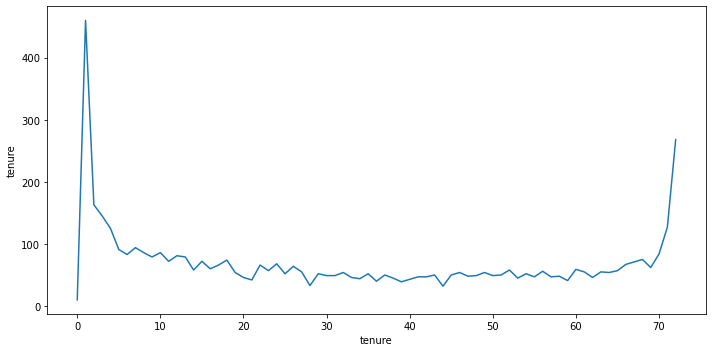

In [116]:
_ = plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=train.groupby(by="tenure")["tenure"].count().index, y=train.groupby(by="tenure")["tenure"].count())
plt.tight_layout();

### Do those that churn pay more money over time?

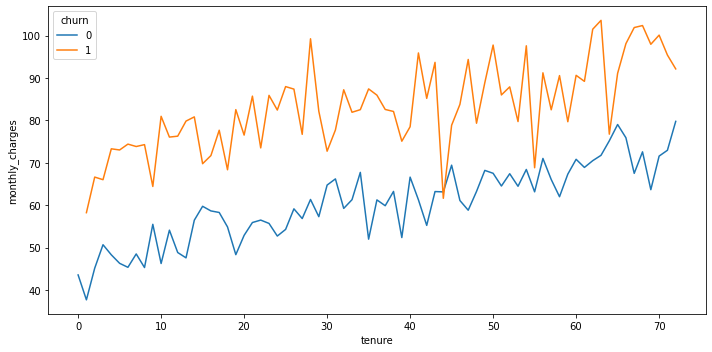

In [115]:
_ = plt.figure(figsize=(10, 5))
sns.lineplot(x="tenure", y="monthly_charges", data=train, hue="churn", ci=None)
plt.tight_layout();

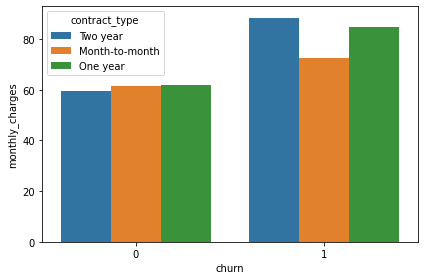

In [134]:
sns.barplot(x="churn", y="monthly_charges", data=train, hue="contract_type", ci=None)
plt.tight_layout();

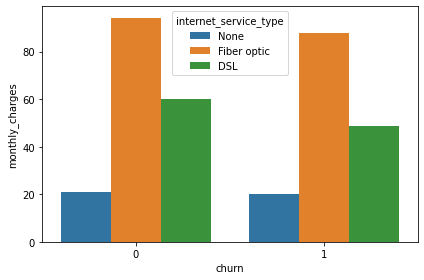

In [129]:
sns.barplot(x="churn", y="monthly_charges", data=train, ci=None, hue="internet_service_type")
plt.tight_layout();

In [162]:
train["payment_type"].value_counts()

Electronic check             1695
Mailed check                 1157
Bank transfer (automatic)    1132
Credit card (automatic)      1104
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

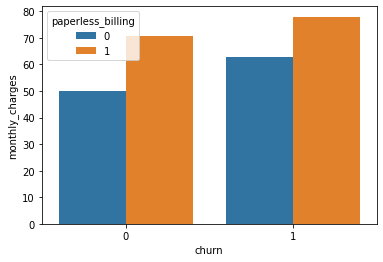

In [161]:
sns.barplot(x="churn", y="monthly_charges", data=train, ci=None, hue="paperless_billing")